In [1]:
from __future__ import division
import csv
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_style('whitegrid')

In [3]:
def read_results(inputfile):
    table_raw = np.empty(23)
    names = []
    sigmas = []
    column_names = []
    noobs = []
    results_follow = 0
    first_row = 1
    f = open(inputfile,'r')
    for line in f:
        words = line.split()
        
def read_censored_table(inputfile,keywords = ['0','1','Total'],start='obs_stu_rce',debug=False):
    write_tab = False
    rawtab = np.zeros((len(keywords)))
    i = 0
    f = open(inputfile,'r')
    for line in f:
        words = line.split()
        if debug:
            print(line)
        if len(words)==3 and words[0]=='Rcensored':
            total = int(words[2])
        elif len(words)>0 and words[0]==start:
            write_tab = True
        elif len(words)>0 and words[0] in keywords and write_tab:
            rawtab[i] = int(words[2].replace(',',''))
            i+=1
            if words[0] == 'Total':
                write_tab = False
    return rawtab

def read_censored_table_twoway(inputfile,keywords = ['0','1','Total'],start='obs_stu_rce',debug=False):
    write_tab = False
    rawtab = np.zeros((len(keywords),2))
    i = 0
    f = open(inputfile,'r')
    for line in f:
        words = line.split()
        if debug:
            print(line)
        if len(words)==3 and words[0]=='Rcensored':
            total = int(words[2])
        elif len(words)>0 and words[0]==start:
            write_tab = True
        elif len(words)>0 and words[0] in keywords and write_tab:
            rawtab[i,0], rawtab[i,1] = int(words[2].replace(',','')),int(words[3].replace(',',''))
            i+=1
            if words[0] == 'Total':
                write_tab = False
    return rawtab

In [4]:
spell_nos = ['0','1','2','Total']
noobs = np.empty(4)
i = 0
f = open('./spell_count.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and words[0] in spell_nos:
        noobs[i] = float(words[2].replace(",",""))
        i+=1
table_noobs = pd.DataFrame(noobs,index=spell_nos,columns=['Individual obs',])
table_noobs['Share'] = table_noobs['Individual obs']/table_noobs['Individual obs'].loc['Total']
table_noobs['Share'] = table_noobs['Share'].apply(lambda x: "{:,.2f}".format(float(x)))
print(table_noobs.to_latex())

\begin{tabular}{lrl}
\toprule
{} &  Individual obs & Share \\
\midrule
0     &        255686.0 &  0.35 \\
1     &        147007.0 &  0.20 \\
2     &        336228.0 &  0.46 \\
Total &        738921.0 &  1.00 \\
\bottomrule
\end{tabular}



In [25]:
censored_noobs = read_censored_table('./Rcensored96.log',keywords = ['0','1','Total','C',"Total2"])

censored_noobs

array([140666.,   6341., 147007.,   8881.,   8881.])

In [37]:
spell_nos = ['C','1','1+1C','2','Total']
noobs = np.empty(3)
i = 0
f = open('./spell_count.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and words[0] in spell_nos:
        noobs[i] = float(words[2].replace(",",""))
        i+=1
censored_noobs = read_censored_table('./Rcensored96.log',keywords = ['0','1','Total','C',"TotalC"])
# print(censored_noobs[3])
noobs = np.insert(noobs, 1,censored_noobs[1])
noobs = np.insert(noobs, 0,censored_noobs[3])
noobs[1] = noobs[1]-noobs[2]
noobs[-1] = np.sum(noobs[:-1])

table_noobs = pd.DataFrame(noobs,index=spell_nos,columns=['Individual obs',])
table_noobs['Share'] = table_noobs['Individual obs']/table_noobs['Individual obs'].loc['Total']
table_noobs['Share']['1'] = table_noobs['Share']['1'] - table_noobs['Share']['1+1C']
table_noobs['Share'] = table_noobs['Share'].apply(lambda x: "{:,.2f}".format(float(x)))
table_noobs['Individual obs'] = table_noobs['Individual obs'].apply(lambda x: "{:,}".format(int(x)))
print(table_noobs.to_latex())

\begin{tabular}{lll}
\toprule
{} & Individual obs & Share \\
\midrule
C     &          8,881 &  0.02 \\
1     &        140,666 &  0.27 \\
1+1C  &          6,341 &  0.01 \\
2     &        336,228 &  0.68 \\
Total &        492,116 &  1.00 \\
\bottomrule
\end{tabular}



In [3]:
spell_nos = ['0','1','2','Total']
noobs = np.empty((4,2))
i = 0
f = open('./spell_count_college.log','r')
for line in f:
    words = line.split()
#     print(line)
    if len(words)>0 and words[0] in spell_nos:
        noobs[i,0] = float(words[2].replace(",",""))
        noobs[i,1] = float(words[3].replace(",",""))
        i+=1
table_noobs = pd.DataFrame(noobs,index=spell_nos,columns=['Non-College','College'])
table_noobs['Non-College share'] = table_noobs['Non-College']/table_noobs['Non-College'].loc['Total']
table_noobs['College share'] = table_noobs['College']/table_noobs['College'].loc['Total']
table_noobs['Non-College share'] = table_noobs['Non-College share'].apply(lambda x: "{:,.2f}".format(float(x)))
table_noobs['College share'] = table_noobs['College share'].apply(lambda x: "{:,.2f}".format(float(x)))
print(table_noobs.to_latex())

\begin{tabular}{lrrll}
\toprule
{} &  Non-College &   College & Non-College share & College share \\
\midrule
0     &     206195.0 &   49491.0 &              0.34 &          0.39 \\
1     &     121137.0 &   25870.0 &              0.20 &          0.21 \\
2     &     286018.0 &   50210.0 &              0.47 &          0.40 \\
Total &     613350.0 &  125571.0 &              1.00 &          1.00 \\
\bottomrule
\end{tabular}



In [39]:
spell_nos = ['C','1','1+1C','2','Total']

noobs_0207 = read_censored_table('./spell_count0207.log',keywords = ['1','2','Total'],start='max_nup')
noobs_0813 = read_censored_table('./spell_count0813.log',keywords = ['1','2','Total'],start='max_nup')
noobs_0207c = read_censored_table('./Rcensored0207.log',keywords = ['0','1','Total','C','TotalC'])
noobs_0813c = read_censored_table('./Rcensored0813.log',keywords = ['0','1','Total','C','TotalC'])

noobs_0207 = np.insert(noobs_0207, 1,noobs_0207c[1])
noobs_0207[0] = noobs_0207[0]-noobs_0207[1]
noobs_0207 = np.insert(noobs_0207, 0,noobs_0207c[3])
noobs_0207[-1] = np.sum(noobs_0207[:-1])
noobs_0813 = np.insert(noobs_0813, 1,noobs_0813c[1])
noobs_0813[0] = noobs_0813[0]-noobs_0813[1]
noobs_0813 = np.insert(noobs_0813, 0,noobs_0813c[3])
noobs_0813[-1] = np.sum(noobs_0813[:-1])

table_noobs = pd.DataFrame(np.vstack((noobs_0207,noobs_0813)).T,index=spell_nos,columns=['2002-2007','2008-2013'])
table_noobs['2002-2007 share'] = table_noobs['2002-2007']/table_noobs['2002-2007'].loc['Total']
table_noobs['2008-2013 share'] = table_noobs['2008-2013']/table_noobs['2008-2013'].loc['Total']

table_noobs['2002-2007 share'] = table_noobs['2002-2007 share'].apply(lambda x: "{:,.3f}".format(float(x)))
table_noobs['2008-2013 share'] = table_noobs['2008-2013 share'].apply(lambda x: "{:,.3f}".format(float(x)))

table_noobs['2002-2007'] = table_noobs['2002-2007'].apply(lambda x: "{:,}".format(int(x)))
table_noobs['2008-2013'] = table_noobs['2008-2013'].apply(lambda x: "{:,}".format(int(x)))
print(table_noobs.to_latex())

\begin{tabular}{lllll}
\toprule
{} & 2002-2007 & 2008-2013 & 2002-2007 share & 2008-2013 share \\
\midrule
C     &       765 &    16,263 &           0.003 &           0.054 \\
1     &   114,353 &   108,831 &           0.430 &           0.364 \\
1+1C  &       180 &     7,731 &           0.001 &           0.026 \\
2     &   150,741 &   166,342 &           0.567 &           0.556 \\
Total &   266,039 &   299,167 &           1.000 &           1.000 \\
\bottomrule
\end{tabular}



array([[115597.,  25069.],
       [  5395.,    946.],
       [120992.,  26015.]])

In [7]:
50501/(50501+26015)

0.6600057504312824

In [8]:
285727/(285727+120992)

0.70251697117666

In [10]:
spell_nos = ['0','1','2','Total']
noobs = np.empty((4,2))
i = 0
f = open('./spell_count_college.log','r')
for line in f:
    words = line.split()
#     print(line)
    if len(words)>0 and words[0] in spell_nos:
        noobs[i,0] = float(words[2].replace(",",""))
        noobs[i,1] = float(words[3].replace(",",""))
        i+=1
table_noobs = pd.DataFrame(noobs,index=spell_nos,columns=['Non-College','College'])
table_noobs['Non-College share'] = table_noobs['Non-College']/table_noobs['Non-College'].loc['Total']
table_noobs['College share'] = table_noobs['College']/table_noobs['College'].loc['Total']
table_noobs['Non-College share'] = table_noobs['Non-College share'].apply(lambda x: "{:,.2f}".format(float(x)))
table_noobs['College share'] = table_noobs['College share'].apply(lambda x: "{:,.2f}".format(float(x)))

print(table_noobs.to_latex())

\begin{tabular}{lrrll}
\toprule
{} &  Non-College &   College & Non-College share & College share \\
\midrule
0     &     205949.0 &   49737.0 &              0.34 &          0.39 \\
1     &     120992.0 &   26015.0 &              0.20 &          0.21 \\
2     &     285727.0 &   50501.0 &              0.47 &          0.40 \\
Total &     612668.0 &  126253.0 &              1.00 &          1.00 \\
\bottomrule
\end{tabular}



In [38]:
spell_nos = ['C','1','1+C','2','Total']
noobs = np.empty((3,2))
i = 0
f = open('./spell_count_college.log','r')
for line in f:
    words = line.split()
#     print(line)
    if len(words)>0 and words[0] in spell_nos:
        noobs[i,0] = float(words[2].replace(",",""))
        noobs[i,1] = float(words[3].replace(",",""))
        i+=1
censored_noobs = read_censored_table_twoway('./RCensoredCollege.log',keywords = ['0','1','Total','C','TotalC'],
                                            start='obs_stu_rc')

noobs = np.insert(noobs, 1,censored_noobs[1,:],axis=0)
noobs[0,:] = noobs[0,:]-noobs[1,:]
noobs = np.insert(noobs, 0,censored_noobs[3,:],axis=0)
noobs[-1,:] = np.sum(noobs[:-1],axis=0)

table_noobs = pd.DataFrame(noobs,index=spell_nos,columns=['Non-College','College'])
table_noobs['Non-College share'] = table_noobs['Non-College']/table_noobs['Non-College'].loc['Total']
table_noobs['College share'] = table_noobs['College']/table_noobs['College'].loc['Total']
table_noobs['Non-College share'] = table_noobs['Non-College share'].apply(lambda x: "{:,.2f}".format(float(x)))
table_noobs['College share'] = table_noobs['College share'].apply(lambda x: "{:,.2f}".format(float(x)))
table_noobs['Non-College'] = table_noobs['Non-College'].apply(lambda x: "{:,}".format(int(x)))
table_noobs['College'] = table_noobs['College'].apply(lambda x: "{:,}".format(int(x)))
print(table_noobs.to_latex())

\begin{tabular}{lllll}
\toprule
{} & Non-College & College & Non-College share & College share \\
\midrule
C     &       7,708 &   1,173 &              0.02 &          0.02 \\
1     &     115,597 &  25,069 &              0.28 &          0.32 \\
1+C   &       5,395 &     946 &              0.01 &          0.01 \\
2     &     285,727 &  50,501 &              0.69 &          0.65 \\
Total &     414,427 &  77,689 &              1.00 &          1.00 \\
\bottomrule
\end{tabular}



In [ ]:
spell_nos = ['1','1+1C','2','Total']
noobs = np.empty(3)
i = 0
f = open('./spell_count.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and words[0] in spell_nos:
        noobs[i] = float(words[2].replace(",",""))
        i+=1
censored_noobs = read_censored_table('./Rcensored96.log')
noobs = np.insert(noobs, 1,censored_noobs[1])
noobs[0] = noobs[0]-noobs[1]
noobs[-1] = np.sum(noobs[:-1])

table_noobs = pd.DataFrame(noobs,index=spell_nos,columns=['Individual obs',])
table_noobs['Share'] = table_noobs['Individual obs']/table_noobs['Individual obs'].loc['Total']
# table_noobs['Share']['1'] = table_noobs['Share']['1'] - table_noobs['Share']['1+1C']
table_noobs['Share'] = table_noobs['Share'].apply(lambda x: "{:,.2f}".format(float(x)))
print(table_noobs.to_latex())

In [46]:
data_sc = pd.read_csv('../results/Upper96.csv')
data_sc1 = pd.read_csv('Upper1.csv')

# data_stu = pd.read_csv('../results/STU.csv')
# data_stu1 = pd.read_csv('STU1.csv')

# data_ltu = pd.read_csv('../results/Lower.csv')
# data_ltu1 = pd.read_csv('Lower1.csv')

# data_raw = pd.read_csv('../results/LLower.csv')
# data_raw1 = pd.read_csv('LLower1.csv')

In [69]:
data_sc_first = data_sc.loc[data_sc['n_spell_u']==1]
data_sc1_first = data_sc1.loc[data_sc1['n_spell_u']==1]
data_sc1_only_one = data_sc1[data_sc1.max_nup==1]
data_sc1_two_more = data_sc1[data_sc1.max_nup==2]

# data_stu_first = data_stu.loc[data_stu['n_spell_u']==1]
# data_stu1_first = data_stu1.loc[data_stu1['n_spell_u']==1]

# data_ltu_first = data_ltu.loc[data_ltu['n_spell_u']==1]
# data_ltu1_first = data_ltu1.loc[data_ltu1['n_spell_u']==1]

# data_raw_first = data_raw.loc[data_raw['n_spell_u']==1]
# data_raw1_first = data_raw1.loc[data_raw1['n_spell_u']==1]

In [71]:
data_sc1_two_more.blank_type.value_counts()/np.sum(data_sc1_two_more.blank_type.value_counts())

short    0.570690
quit     0.322807
SE       0.106503
Name: blank_type, dtype: float64

In [72]:
data_sc1_only_one.blank_type.value_counts()/np.sum(data_sc1_only_one.blank_type.value_counts())

quit     0.389721
short    0.335953
SE       0.274325
Name: blank_type, dtype: float64

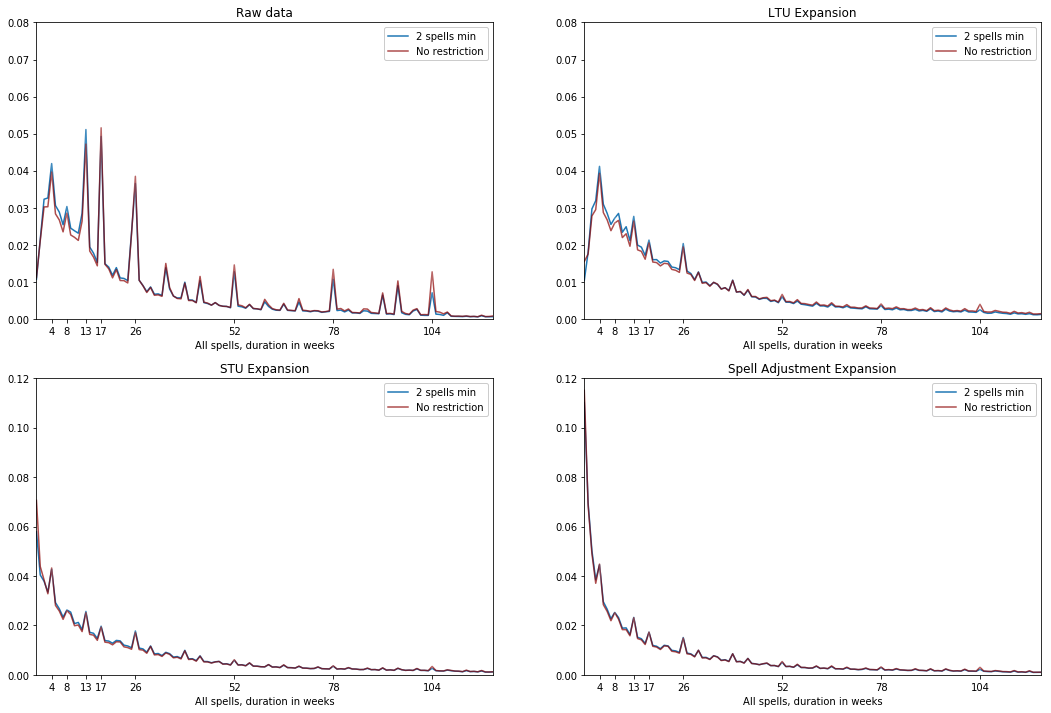

In [7]:
week_range = np.arange(0,1092,7)
spikes = (4,8,13,17,26,52,78,104)

plt.figure(figsize=(18,12))

plt.subplot(221)
plt.title('Raw data')
data_21, bins21 = np.histogram(data_raw['LLdays'],week_range)
data_11, bins11 = np.histogram(data_raw1['LLdays'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('All spells, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.08)

plt.subplot(222)
plt.title('LTU Expansion')
data_21, bins21 = np.histogram(data_ltu['Ldays'],week_range)
data_11, bins11 = np.histogram(data_ltu1['Ldays'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('All spells, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.08)

plt.subplot(223)
plt.title('STU Expansion')
data_21, bins21 = np.histogram(data_stu['Bdays'],week_range)
data_11, bins11 = np.histogram(data_stu1['Bdays'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('All spells, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.12)

plt.subplot(224)
plt.title('Spell Adjustment Expansion')
data_21, bins21 = np.histogram(data_sc['real_days_1'],week_range)
data_11, bins11 = np.histogram(data_sc1['real_days_1'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('All spells, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.12)
# plt.savefig("Sample_selection_all.png", format="png", bbox_inches='tight')

plt.show()

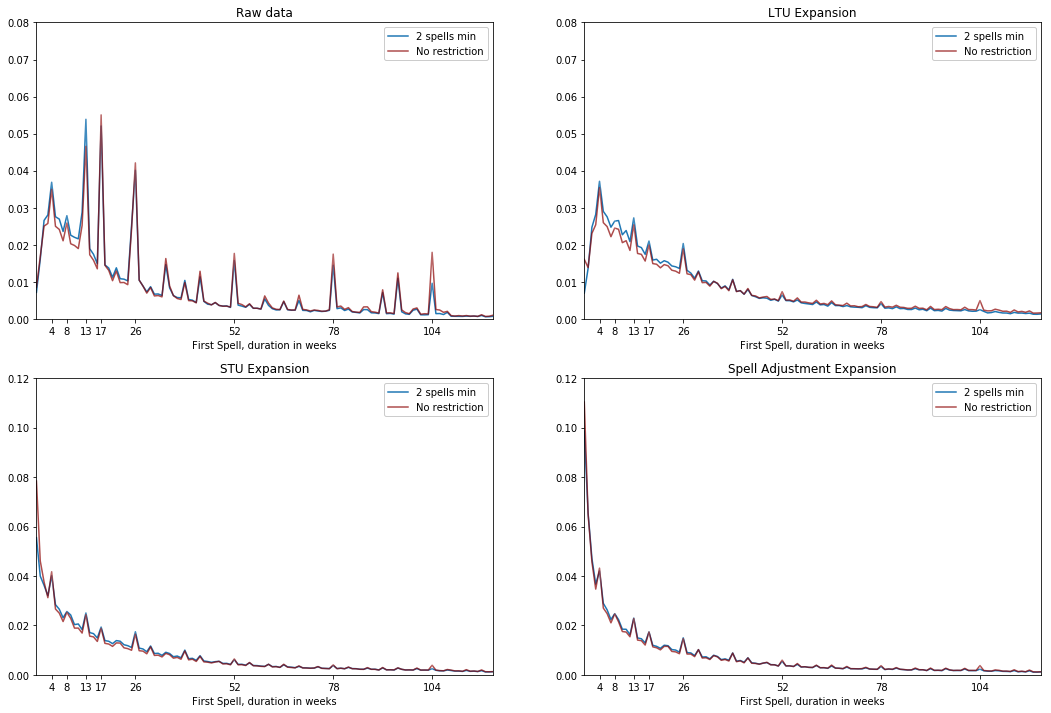

In [8]:
week_range = np.arange(0,1092,7)
spikes = (4,8,13,17,26,52,78,104)

plt.figure(figsize=(18,12))

plt.subplot(221)
plt.title('Raw data')
data_21, bins21 = np.histogram(data_raw_first['LLdays'],week_range)
data_11, bins11 = np.histogram(data_raw1_first['LLdays'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.08)

plt.subplot(222)
plt.title('LTU Expansion')
data_21, bins21 = np.histogram(data_ltu_first['Ldays'],week_range)
data_11, bins11 = np.histogram(data_ltu1_first['Ldays'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.08)

plt.subplot(223)
plt.title('STU Expansion')
data_21, bins21 = np.histogram(data_stu_first['Bdays'],week_range)
data_11, bins11 = np.histogram(data_stu1_first['Bdays'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.12)

plt.subplot(224)
plt.title('Spell Adjustment Expansion')
data_21, bins21 = np.histogram(data_sc_first['real_days_1'],week_range)
data_11, bins11 = np.histogram(data_sc1_first['real_days_1'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.12)
# plt.savefig("Sample_selection_first.png", format="png", bbox_inches='tight')

plt.show()

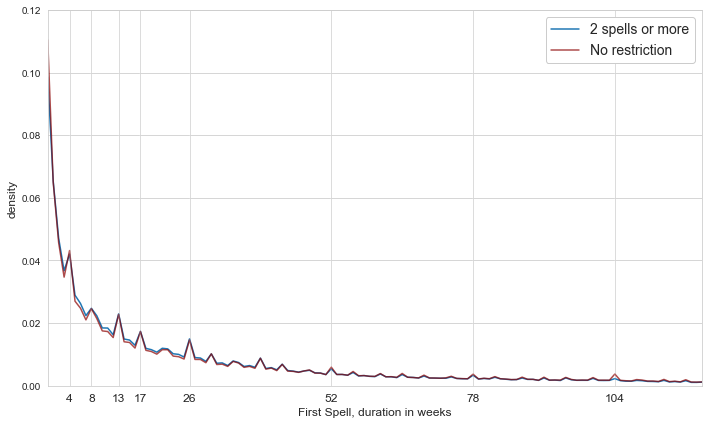

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
data_21, bins21 = np.histogram(data_sc_first['real_days_1'],week_range)
data_11, bins11 = np.histogram(data_sc1_first['real_days_1'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells or more')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0,fontsize=14)
plt.xticks(spikes,fontsize=12)
plt.ylabel('density',fontsize=12 )
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=12 ) #,fontsize=32
plt.ylim(0,0.12)
plt.tight_layout()
plt.savefig("Sample_selection_first_SaC.png", format="png", bbox_inches='tight')
plt.show()

In [ ]:
data_sc1[data_sc1.max_nup==2]

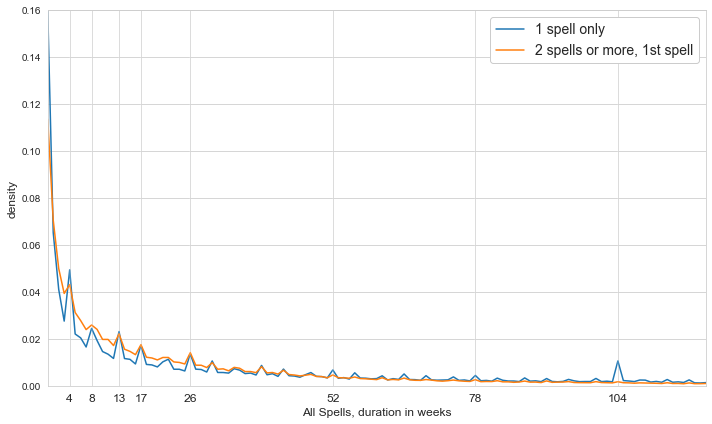

In [76]:
week_range = np.arange(0,1092,7)
spikes = (4,8,13,17,26,52,78,104)

plt.figure(figsize=(10,6))

# data_21, bins21 = np.histogram(data_sc['real_days_1'],week_range)
data_21, bins21 = np.histogram(data_sc1_two_more[data_sc1_two_more.n_spell_u==1]['real_days_1'],week_range)
data_22, bins22 = np.histogram(data_sc1_two_more[data_sc1_two_more.n_spell_u==2]['real_days_1'],week_range)

# data_11, bins11 = np.histogram(data_sc1_first['real_days_1'],week_range)
data_11, bins11 = np.histogram(data_sc1_only_one['real_days_1'],week_range)

plt.plot(data_11/np.sum(data_11),label='1 spell only') #,c='darkred',alpha=0.7
plt.plot(data_21/np.sum(data_21),label='2 spells or more, 1st spell')
# plt.plot(data_22/np.sum(data_22),label='2 spells or more, 2nd spell')
plt.legend(loc='best', framealpha=1.0,fontsize=14)
plt.xticks(spikes,fontsize=12)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('All Spells, duration in weeks',fontsize=12 ) #,fontsize=32
plt.ylabel('density',fontsize=12 )
plt.ylim(0,0.16)
plt.tight_layout()
plt.savefig("Sample_selection_all_SaC.png", format="png", bbox_inches='tight')
plt.show()

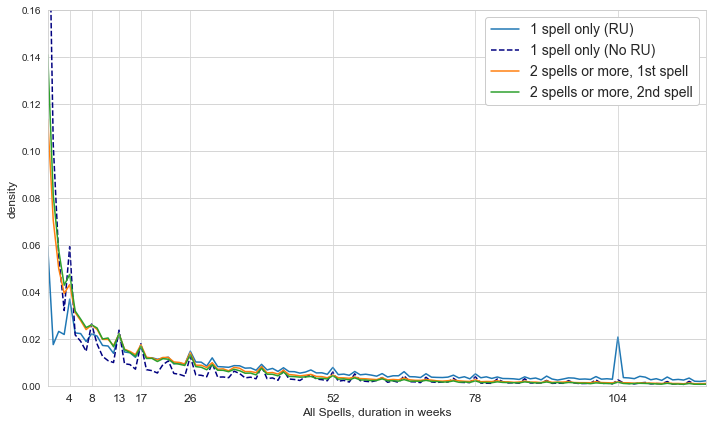

In [73]:
week_range = np.arange(0,1092,7)
spikes = (4,8,13,17,26,52,78,104)

plt.figure(figsize=(10,6))

# data_21, bins21 = np.histogram(data_sc['real_days_1'],week_range)
data_21, bins21 = np.histogram(data_sc1_two_more[data_sc1_two_more.n_spell_u==1]['real_days_1'],week_range)
data_22, bins22 = np.histogram(data_sc1_two_more[data_sc1_two_more.n_spell_u==2]['real_days_1'],week_range)

# data_11, bins11 = np.histogram(data_sc1_first['real_days_1'],week_range)
data_11ru, bins11 = np.histogram(data_sc1_only_one[data_sc1_only_one.U_ghost==0]['real_days_1'],week_range)
data_11nru, bins11 = np.histogram(data_sc1_only_one[data_sc1_only_one.U_ghost==1]['real_days_1'],week_range)

plt.plot(data_11ru/np.sum(data_11ru),label='1 spell only (RU)') #,c='darkred',alpha=0.7
plt.plot(data_11nru/np.sum(data_11nru),label='1 spell only (No RU)',c='navy',ls='--')
plt.plot(data_21/np.sum(data_21),label='2 spells or more, 1st spell')
plt.plot(data_22/np.sum(data_22),label='2 spells or more, 2nd spell')
plt.legend(loc='best', framealpha=1.0,fontsize=14)
plt.xticks(spikes,fontsize=12)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('All Spells, duration in weeks',fontsize=12 ) #,fontsize=32
plt.ylabel('density',fontsize=12 )
plt.ylim(0,0.16)
plt.tight_layout()
# plt.savefig("Sample_selection_all_SaC.png", format="png", bbox_inches='tight')
plt.show()